<a id='top'></a>

<div>
<img src="https://raw.githubusercontent.com/nlihin/data-analytics/main/images/marketing.PNG" width="400"/>
</div>


1. [Handling data](#section1)

   1.1 [Fix columns](#section1.1)   
   1.2 [checking values](#section1.2)  
   1.3 [Melt the data](#melting)\
   1.4 [Outliers](#section1.4)    
   1.5 [Transformations](#section1.5)


### information on tha data
We'll work with a dataset, based on [Google Play Store](https://play.google.com/store/apps)

The source of the data file  [here](https://www.kaggle.com/datasets/bhavikjikadara/google-play-store-applications/data)

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [299]:
url = 'https://raw.githubusercontent.com/hodsfiles/HrDataProject/main/googleplaystore.csv'
apps = pd.read_csv(url)
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [300]:
apps.shape

(10841, 14)

<a id='section1'></a>
### 1. Handling Data
[back to top](#top)
<a id='section1.1'></a>
#### 1.1 Fix columns

In [301]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [302]:
apps = apps.drop('Unnamed: 0', axis=1)
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<a id='section1.2'></a>
#### 1.2 checking values
[back to top](#top)

In [303]:
apps.shape

(10841, 13)

In [304]:
apps.duplicated().sum()

483

In [305]:
#On play store, two apps may have same name, but all the size, installs, rating, reviews, price need not be same. so using these categories, we will drop the duplicates in the data
apps.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

In [306]:
apps.duplicated().sum()

0

In [307]:
apps.dtypes


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [308]:
# Columns to clean 
cols = ['Installs','Price']

# Characters to remove
chars = ['+',",","$"]

# storing columns_to_clean in col variable
for col in cols:
    # storing characters_to_clean in char variable
    for char in chars:
        # Replacing unnecessary characters with empty string
        apps[col] = apps[col].apply(lambda c: c.replace(char, ''))


In [309]:

# ניקוי המילים "and up" מהעמודה "Android Ver"
apps['Android Ver'] = apps['Android Ver'].str.replace('and up', '', regex=False)


In [310]:

def size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1000
    return None

apps.loc[:, 'Size_MB'] = apps['Size'].apply(size_to_mb)

# Display the first few rows to verify the changes
print(apps[['Size', 'Size_MB']].head())

   Size  Size_MB
0   19M     19.0
1   14M     14.0
2  8.7M      8.7
3   25M     25.0
4  2.8M      2.8


In [311]:
apps['Price'].unique()

array(['0', '4.99 ', '3.99 ', '6.99 ', '1.49 ', '2.99 ', '7.99 ', '5.99 ',
       '3.49 ', '1.99 ', '9.99 ', '7.49 ', '0.99 ', '9.00 ', '5.49 ',
       '10.00 ', '24.99 ', '11.99 ', '79.99 ', '16.99 ', '14.99 ',
       '1.00 ', '29.99 ', '12.99 ', '2.49 ', '10.99 ', '1.50 ', '19.99 ',
       '15.99 ', '33.99 ', '74.99 ', '39.99 ', '3.95 ', '4.49 ', '1.70 ',
       '8.99 ', '2.00 ', '3.88 ', '25.99 ', '399.99 ', '17.99 ',
       '400.00 ', '3.02 ', '1.76 ', '4.84 ', '4.77 ', '1.61 ', '2.50 ',
       '1.59 ', '6.49 ', '1.29 ', '5.00 ', '13.99 ', '299.99 ', '379.99 ',
       '37.99 ', '18.99 ', '389.99 ', '19.90 ', '8.49 ', '1.75 ',
       '14.00 ', '4.85 ', '46.99 ', '109.99 ', '154.99 ', '3.08 ',
       '2.59 ', '4.80 ', '1.96 ', '19.40 ', '3.90 ', '4.59 ', '15.46 ',
       '3.04 ', '4.29 ', '2.60 ', '3.28 ', '4.60 ', '28.99 ', '2.95 ',
       '2.90 ', '1.97 ', '200.00 ', '89.99 ', '2.56 ', '30.99 ', '3.61 ',
       '394.99 ', '1.26 ', 'Everyone', '1.20 ', '1.04 '], dtype=object)

In [312]:
apps = apps.drop('Size', axis=1)

In [313]:
apps.shape

(10350, 13)

In [314]:
apps.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4,2.8


In [315]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [318]:
apps.Reviews = pd.to_numeric(apps.Reviews, errors='coerce')
apps.Price = pd.to_numeric(apps.Price, errors='coerce')
apps.Rating = pd.to_numeric(apps.Rating, errors='coerce')
apps.Installs = pd.to_numeric(apps.Installs, errors='coerce') 
apps.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [323]:
apps.replace('Varies with device', np.nan, inplace=True)

In [357]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)


Missing data before handling:
App                  0
Category             0
Rating            1464
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1309
Android Ver       1222
Size_MB           1524
dtype: int64


In [355]:
missing_index_Reviews = apps[apps['Reviews'].isnull()].index
missing_index_Installs = apps[apps['Installs'].isnull()].index
missing_index_Type = apps[apps['Type'].isnull()].index
missing_index_Price = apps[apps['Price'].isnull()].index
missing_index_Content_Rating = apps[apps['Content Rating'].isnull()].index

In [356]:
apps = apps.drop(missing_index_Reviews)
apps = apps.drop(missing_index_Installs)
apps = apps.drop(missing_index_Type)
apps = apps.drop(missing_index_Price)
apps = apps.drop(missing_index_Content_Rating)

<Axes: xlabel='Size_MB', ylabel='Count'>

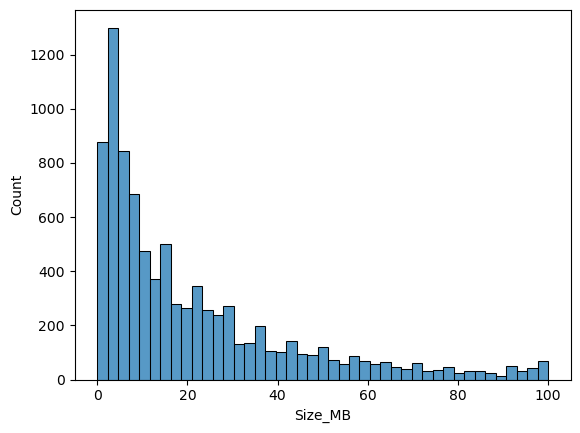

In [335]:
sns.histplot(apps, x = 'Size_MB')

<Axes: xlabel='Size_MB', ylabel='Count'>

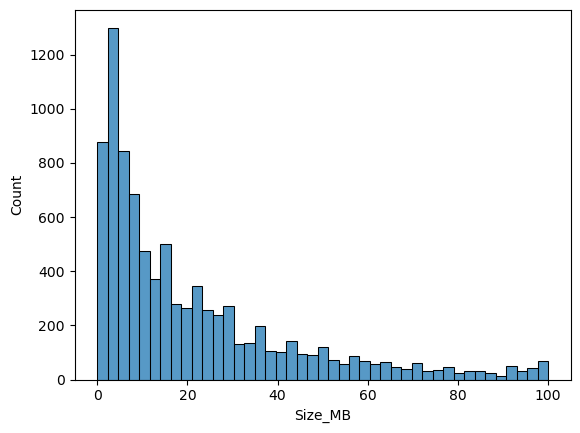

In [334]:
sns.histplot(apps, x = 'Size_MB')

<Axes: ylabel='Size_MB'>

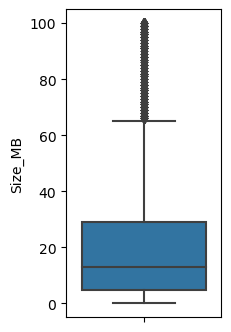

In [327]:
plt.figure(figsize=(2,4))
sns.boxplot(data = apps, y= 'Size_MB')

In [ ]:
apps["Size_MB"] = apps["Size_MB"].apply(lambda x: x.fillna(x.mean()))

In [ ]:
# Separate numeric and non-numeric columns
numeric_cols = apps.select_dtypes(include=[np.number]).columns
non_numeric_cols = apps.select_dtypes(exclude=[np.number]).columns

# Fill missing values for numeric columns with the median
apps[numeric_cols] = apps[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Fill missing values for non-numeric columns with the mode
apps[non_numeric_cols] = apps[non_numeric_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no more missing values
missing_data_after = apps.isnull().sum()
print("Missing data after handling:")
print(missing_data_after)

In [228]:
apps['Type'] = apps['Type'].map({'Free': 0, 'Paid': 1})

array([[<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Reviews'}>],
       [<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Size_MB'}>, <Axes: >]], dtype=object)

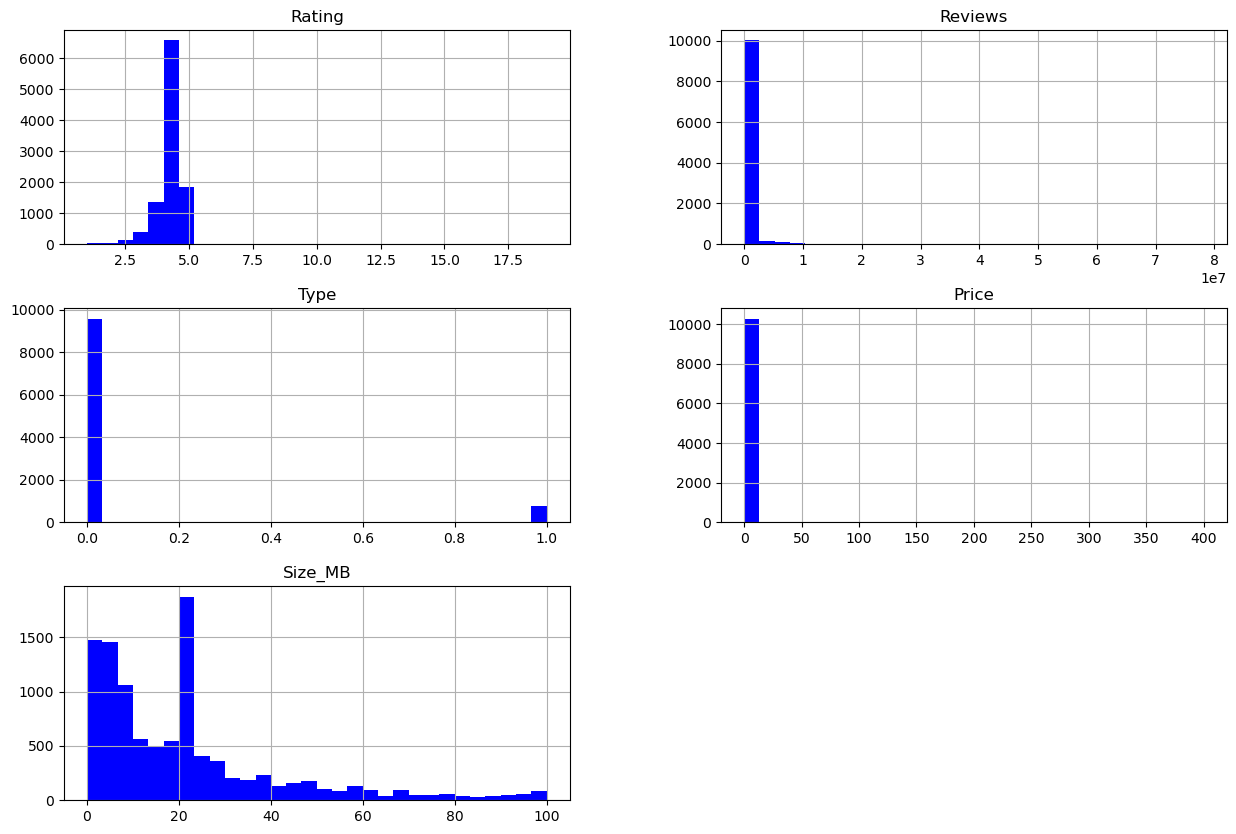

In [229]:
apps.hist(bins=30, figsize=(15,10), color='b')

In [233]:

apps.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000,0.0,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000,0.0,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000,0.0,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000,0.0,0.0,Teen,Art & Design,8-Jun-18,1,4.2,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000,0.0,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4,2.8


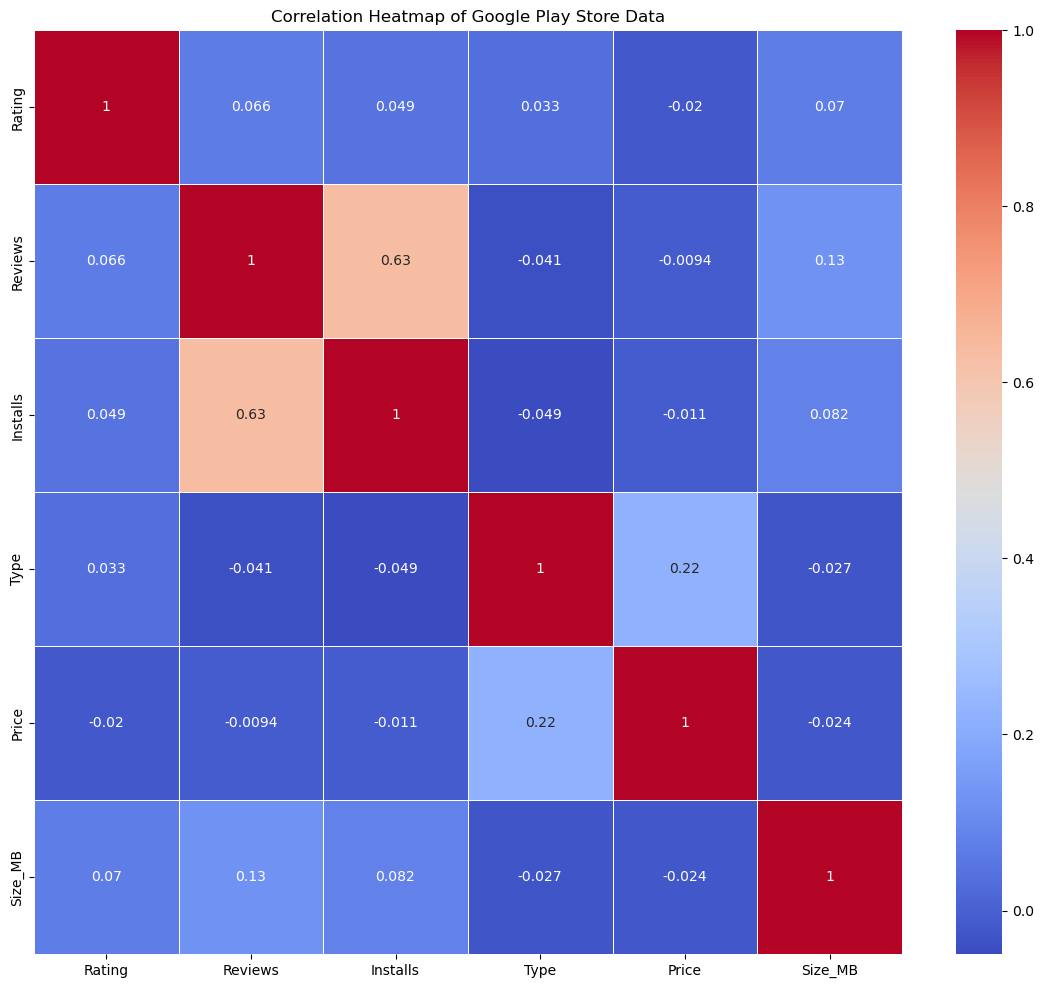

In [240]:
plt.figure(figsize=(14, 12))
correlation_matrix = apps.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Google Play Store Data')
plt.show()

Number of categories =  34


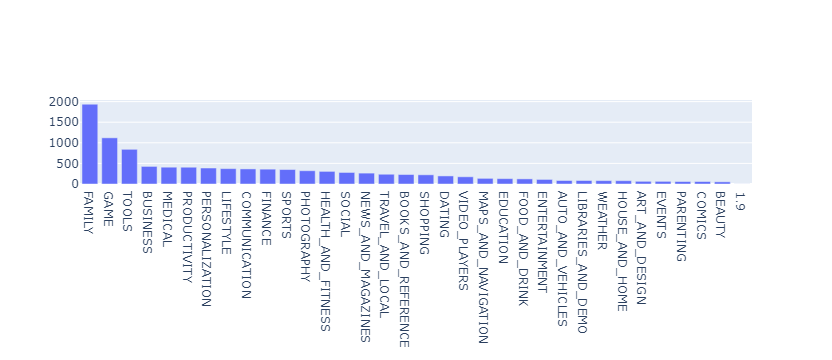

In [241]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps["Category"].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps["Category"].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

In [194]:
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_MB'],
      dtype='object')

Number of options =  6


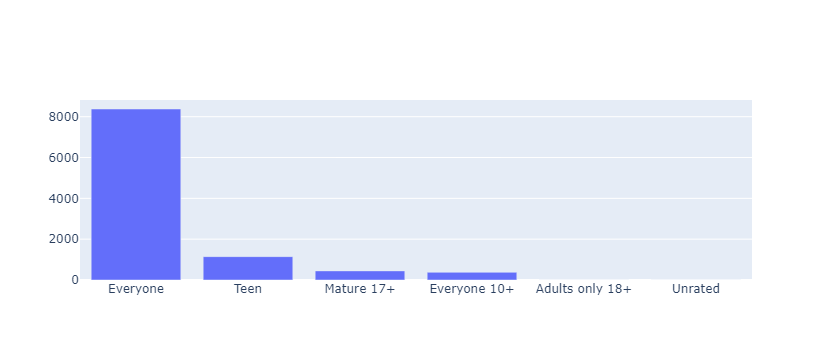

In [242]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_options = len(apps["Content Rating"].unique())
print('Number of options = ', num_options)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_Content_Rating = apps["Content Rating"].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_Content_Rating.index, # index = category name
        y = num_apps_in_Content_Rating.values, # value = count
)]

plotly.offline.iplot(data)

Average app rating =  4.189330332020258


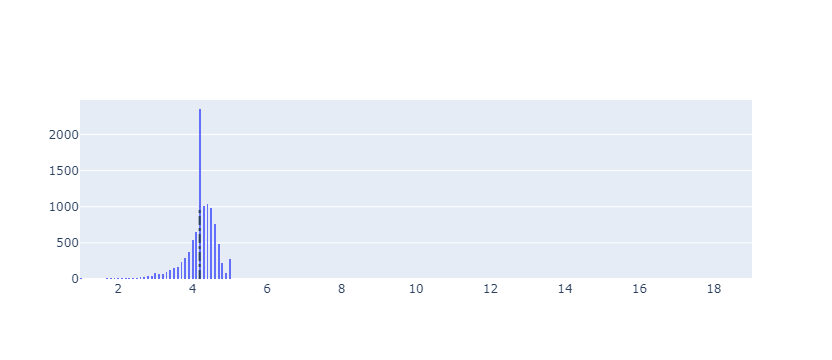

In [243]:
# Average rating of apps
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

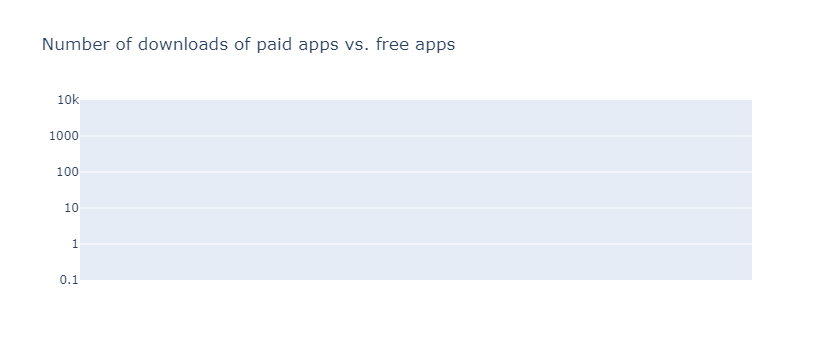

In [244]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps 
    y=apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})